In [1]:
#Load all the basic libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
#Load the dataset.
data = pd.read_csv('User_Data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,15691540.0,71658.0,15566689.0,15626764.0,15694342.0,15750363.0,15815236.0
Age,400.0,38.0,10.0,18.0,30.0,37.0,46.0,60.0
EstimatedSalary,400.0,69742.0,34097.0,15000.0,43000.0,70000.0,88000.0,150000.0
Purchased,400.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Our dataset is pretty much cleaned and no need of any preprocessing

array([[<AxesSubplot:title={'center':'User ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Purchased'}>]], dtype=object)

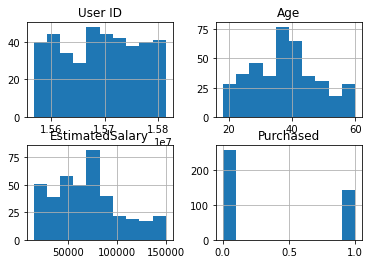

In [6]:
data.hist()

We will take only Age and EstimatedSalary as our independent variables X because of other features like Gender and User ID are irrelevant and have no effect on the purchasing capacity of a person. Purchased is our
dependent variable y.



In [7]:
feature_cols = ['Age','EstimatedSalary']
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [9]:
#The next step is to split the dataset into training and test.
#Importing test and train from sk.learn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.


In [10]:
#Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [11]:
# importing Decision Tree algorithem
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [12]:
#prediction
y_pred=classifier.predict(X_test)

In [13]:
#Accuracy
np.mean(y_pred==y_test)

0.9125

The decision tree classifier gave an accuracy of 90%.

In [14]:
# check confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

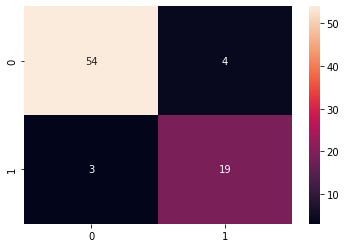

In [15]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [16]:
cm

array([[54,  4],
       [ 3, 19]], dtype=int64)